# Random Forest Classifier: Hyperparameters and how to fine-tune them

In [12]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np 
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt 
from pandas.plotting import register_matplotlib_converters

### The most important hyper-parameters of a Random Forest that can be tuned are:
1. n_estimators - Number of Decision Trees in the forest
2. criterion - The criteria with which to split on each node : {“gini”, “entropy”, “log_loss”}
3. max_depth - The maximum depth of the individual trees
4. min_samples_split - The minimum samples to split on at an internal node of the trees
5. max_leaf_nodes - Maximum number of leaf nodes

## n_estimators

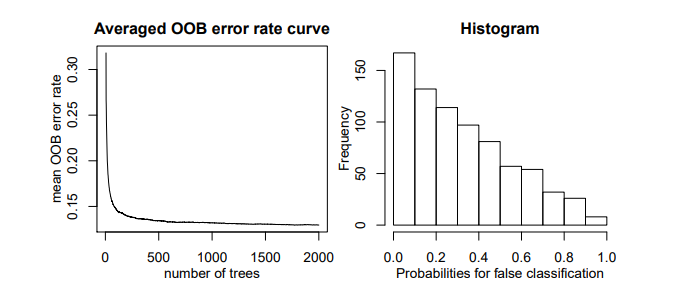

Decrease in the classification error as we increase the number of trees and histogram of estimates for a RF with 2000 trees

### Conclusion: 
Fine tuning the number of trees is unnecessary, simply set the number of trees to a large, computationally feasable number and you’re good to go.

## criterion

We have to calculate a measure of impurity with either Gini or Entropy, which can result in a different split sometimes. Take the following examples of a problem where we have two classes, A and B:

1. A node with only observations of class A is 100% pure according to both, Gini and entropy.
2. A node with 10 observations of class A, and 10 of class B is 100% impure according to both, Gini and entropy.
3. A node with 3 observations of class A and 1 of class B is ether 75% or 81% impure, depending if we use Gini or Entropy respectively.

Depending on which of the two we use our model can change. There is not a real rule of thumb here to know which one to pick. Different decision tree algorithms use different metrics (CART uses Gini, whereas ID3 uses Entropy)

### Conclusion: 
fine tuning the split criteria could lead to different forests, and as there is only two possible values, we recommend trying them both for classification forests.

## max_depth

Increasing the Depth of individual trees increases the possible number of feature/value combinations that are taken into account. The deeper the tree, the more splits it has and the more information about the data it takes into account.

In an individual tree this causes overfitting, however in Random Forest, because of the way the ensemble is built, it is harder to overfit, although it is still possible for large depth values.

### Conclusion: 
fine tuning the tree depth is unnecessary, pick a reasonable value and carry on with other hyperparameters.

# Grid Search CV

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
# Dropping these columns ->'Cabin', 'PassengerId', 'Name', 'Ticket'
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked']]
print(df.shape)

(891, 8)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [18]:
#FIlling Missing Values
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Age'].fillna(df['Embarked'].mode()[0], inplace=True)

# Decoding categorical Data
df['Sex'] = np.where(df['Sex']=='male', 0, 1) 
df.replace({"Embarked": {"S": 1, "Q": 2, "C": 3}}, inplace=True)
df.replace({"Age":{"S":1}}, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,3
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,1


In [19]:
# Split the data into x_train and y_train data sets
x = df.iloc[:,:-1]
y = df.loc[0:len(df),['Embarked']] 
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=0)
x_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
857,1,1,0,51.0,0,0,26.5500
52,1,1,1,49.0,1,0,76.7292
386,0,3,0,1.0,5,2,46.9000
124,0,1,0,54.0,0,1,77.2875
578,0,3,1,1.0,1,0,14.4583
...,...,...,...,...,...,...,...
835,1,1,1,39.0,1,1,83.1583
192,1,3,1,19.0,1,0,7.8542
629,0,3,0,1.0,0,0,7.7333
559,1,3,1,36.0,1,0,17.4000


#### As of now we'll only focus on two hyperparameters:
1. n_estimators determine the number of decision trees in the forest
2. max_depth defines the maximum number of branches in each decision tree

In [20]:
# Train a single random forest classifier
clf = RandomForestClassifier(max_depth=2, random_state=0, n_estimators = 100)
x_train = x_train.values
y_train = y_train.values
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

# Create a confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

<ipython-input-20-83101eedc0bb>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)
c:\Users\vivek Negi\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


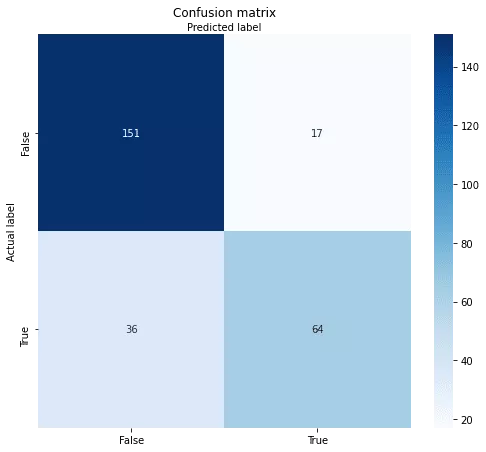

## Hyperparameter Tuning a Classification Model using the Grid Search Technique

In [21]:
# Define Parameters
max_depth=[2, 8, 16]
n_estimators = [64, 128, 256]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

# Build the grid search
dfrst = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
grid = GridSearchCV(estimator=dfrst, param_grid=param_grid, cv = 5)
grid_results = grid.fit(x_train, y_train)

# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))
results_df = pd.DataFrame(grid_results.cv_results_)
results_df

c:\Users\vivek Negi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\vivek Negi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\vivek Negi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\vivek Negi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: 

Best: [0.73676129 0.73836129 0.73676129 0.78334194 0.78654194 0.79135484
 0.80898065 0.79452903 0.78971613], using {'max_depth': 16, 'n_estimators': 64}


c:\Users\vivek Negi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.067993,0.005373,0.006006,0.000884,2,64,"{'max_depth': 2, 'n_estimators': 64}",0.736,0.736,0.736,0.741935,0.733871,0.736761,0.002715,8
1,0.131402,0.006862,0.011197,0.000979,2,128,"{'max_depth': 2, 'n_estimators': 128}",0.744,0.736,0.736,0.741935,0.733871,0.738361,0.003896,7
2,0.285457,0.037926,0.023455,0.000939,2,256,"{'max_depth': 2, 'n_estimators': 256}",0.736,0.736,0.736,0.741935,0.733871,0.736761,0.002715,8
3,0.084674,0.011593,0.006508,0.001136,8,64,"{'max_depth': 8, 'n_estimators': 64}",0.752,0.792,0.784,0.790323,0.798387,0.783342,0.016327,6
4,0.154230,0.009930,0.012155,0.000663,8,128,"{'max_depth': 8, 'n_estimators': 128}",0.752,0.776,0.816,0.782258,0.806452,0.786542,0.022746,5
5,0.330506,0.016708,0.026421,0.004385,8,256,"{'max_depth': 8, 'n_estimators': 256}",0.784,0.776,0.800,0.798387,0.798387,0.791355,0.009628,3
6,0.092138,0.014606,0.007016,0.001793,16,64,"{'max_depth': 16, 'n_estimators': 64}",0.784,0.800,0.848,0.790323,0.822581,0.808981,0.023496,1
7,0.157963,0.009912,0.011723,0.000691,16,128,"{'max_depth': 16, 'n_estimators': 128}",0.752,0.800,0.840,0.782258,0.798387,0.794529,0.028537,2
8,0.352917,0.025285,0.030975,0.005497,16,256,"{'max_depth': 16, 'n_estimators': 256}",0.752,0.800,0.824,0.782258,0.790323,0.789716,0.023493,4
